# Ejercico 1.12

![Screenshot 2024-03-04 at 4.51.53 p.m..png](<attachment:Screenshot 2024-03-04 at 4.51.53 p.m..png>)
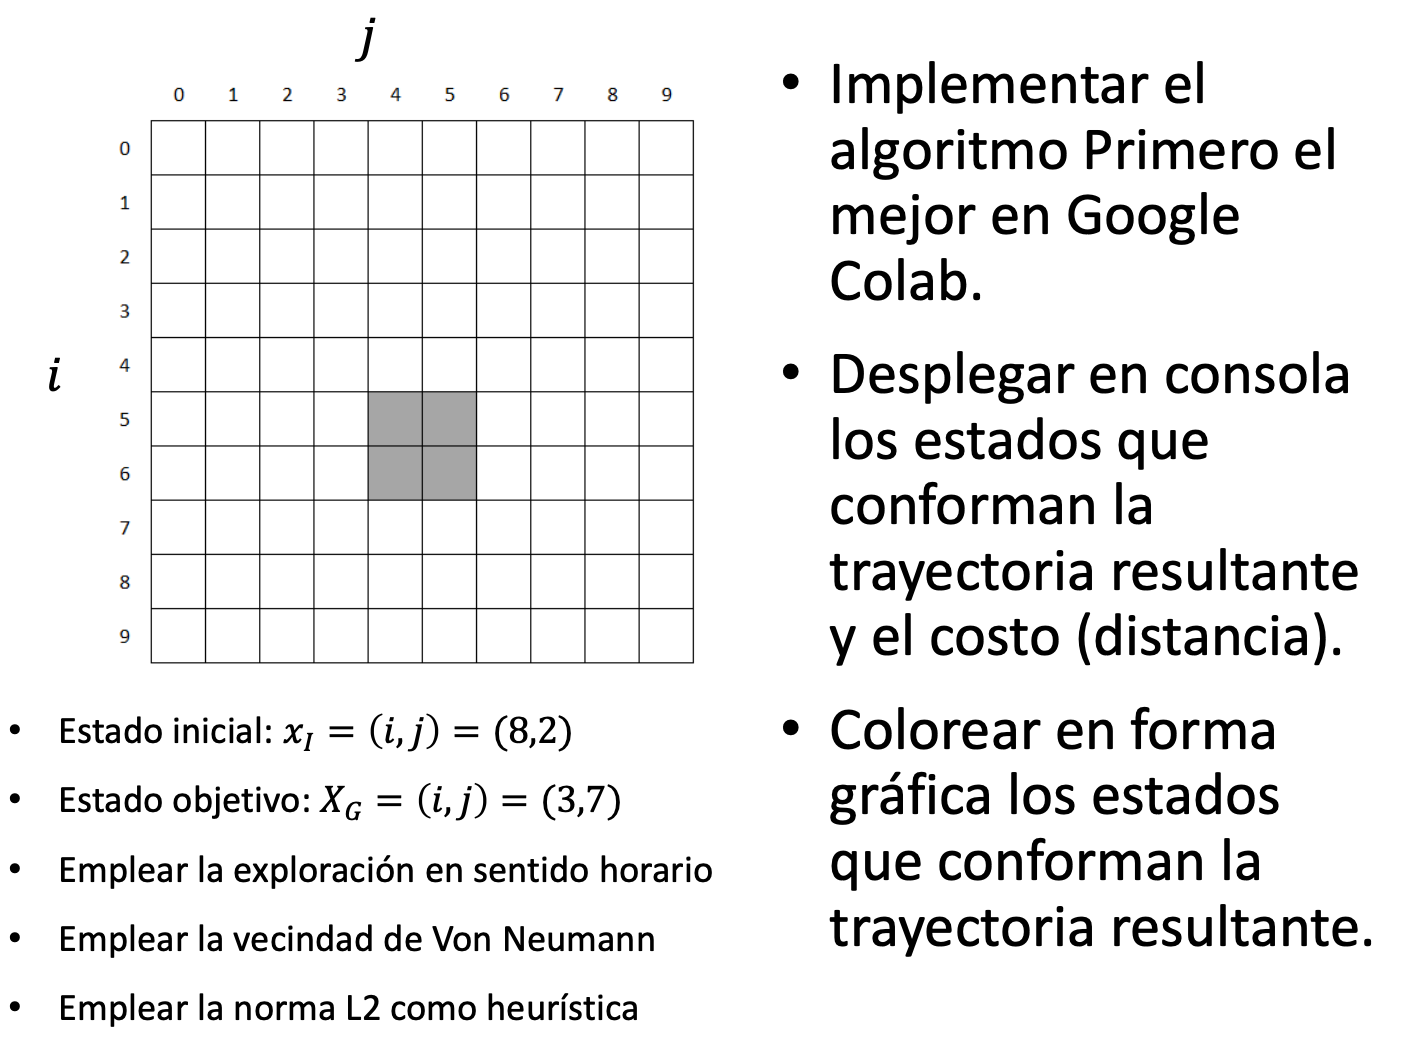

Number of steps:  17
Final Cost:  16.0
Final path:  [(8, 2), (7, 2), (6, 2), (5, 2), (4, 2), (3, 2), (2, 2), (1, 2), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 7), (2, 7), (3, 7)]


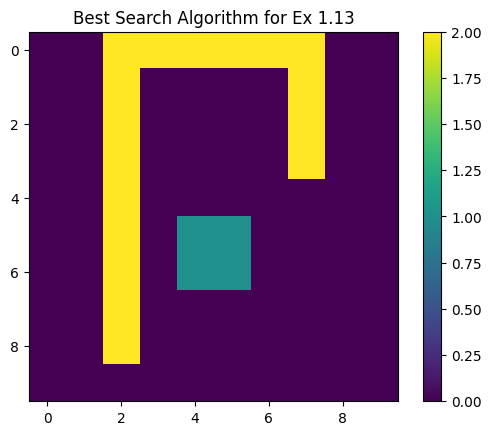

In [6]:
import heapq
from math import dist
import numpy as np
import matplotlib.pyplot as plt

# CODIGO BUENO Y PROBADO
# Data for 1.13
start = (8 ,2)
end = (3, 7)
maze = []
path = []
costs = {start: 0}
final_costs_list = []

# Assume this part reads your maze correctly
with open("/Users/davidroldanmachado/Desktop/ICC/8/ICC-CI/Ex/EjercicioBestSearch/maze_03.csv", "r") as file:
    for line in file:
        line = line.split(",")
        row = []
        for c in line:
            if "1" in c:
                row.append(1)
            else:
                row.append(0)
        maze.append(row)



# print("Before maze", maze)
# Euclidean distance as the heuristic
def euclidean_distance(start, end):
    return ((start[0] - end[0])**2 + (start[1] - end[1])**2)**0.5

def reconstruct_path(start, current, predecessors,costs):
    
    # print(costs)
    path = []
    while current != start:
        path.insert(0, current)
        current = predecessors[current]
    path.insert(0, start)
    
    final_cost = 0
    for i in path[1:]:
       final_cost += costs[i] 


    return path, final_cost 

def retrieving_path_cost(costs):
    return sum(costs.values())

def best_first_search(start, goal, maze):
    # Directions in clockwise order: North, East, South, West
    directions = [(0, -1), (1, 0), (0, 1), (-1, 0)]
    queue = []
    heapq.heappush(queue, (euclidean_distance(start, goal), start))
    predecessors = {start: None}
    visited = set(start)
    

    while queue:
        current_heuristic, current_node = heapq.heappop(queue)
        if current_node == goal:
            return reconstruct_path(start, goal, predecessors, costs)


        for direction in directions:
            next_node = (current_node[0] + direction[0], current_node[1] + direction[1])
            if (0 <= next_node[0] < len(maze) and 0 <= next_node[1] < len(maze[0]) and maze[next_node[0]][next_node[1]] == 0
            and maze[next_node[0]][next_node[1]] == 0 and next_node not in visited):
               # Check if not visited
                #new_cost = euclidean_distance(next_node, goal)
                new_cost = euclidean_distance(current_node,next_node)
                heapq.heappush(queue, (new_cost, next_node))
                predecessors[next_node] = current_node
                costs[next_node] = new_cost
                # final_costs_list.append(new_cost)
                visited.add(next_node)  # Mark as visited
                # maze[next_node] = 2
                
        # print(final_costs_list)
    return None

def main():
    result,final_c = best_first_search(start, end, maze)
    if result is not None:
        print("Number of steps: ", len(result))
        print("Final Cost: ", final_c)
        print("Final path: ", result)

        for (x, y) in result:
            maze[x][y] = 2  # Mark the final path
        plt.title("Best Search Algorithm for Ex 1.12")
        plt.imshow(maze, cmap='viridis', origin='upper')
        plt.colorbar() 
        plt.show()
         # Optional: Adds a colorbar to help distinguish values
    
    else:
        print("No path found.")

if __name__ == "__main__":
    main()


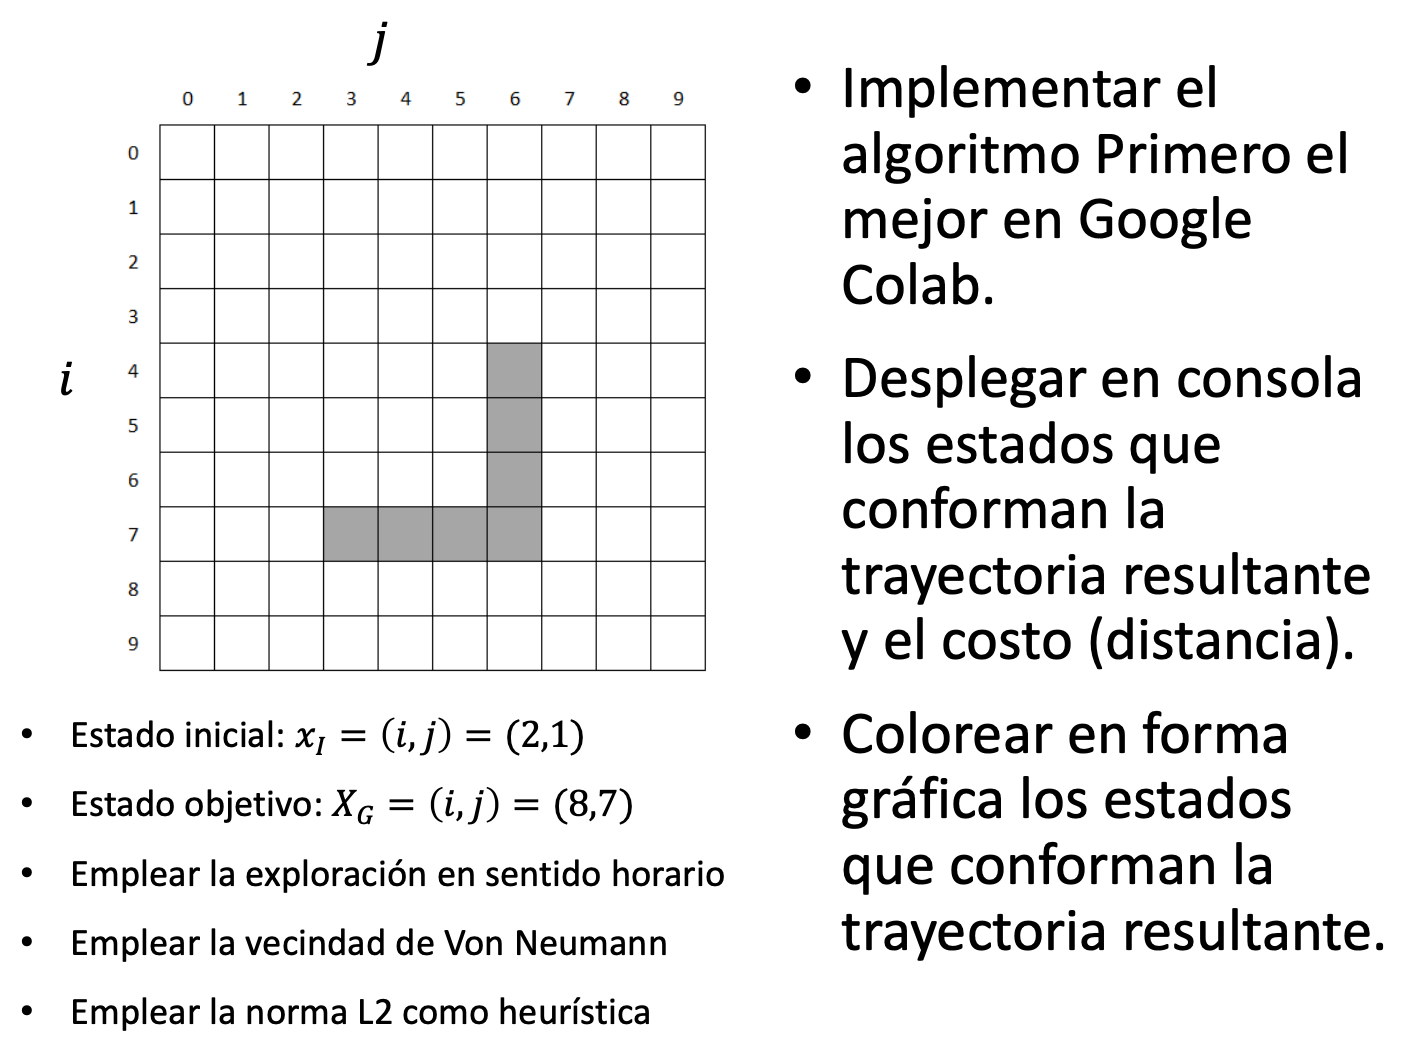

Number of steps:  17
Final Cost:  16.0
Final path:  [(2, 1), (1, 1), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (8, 7)]


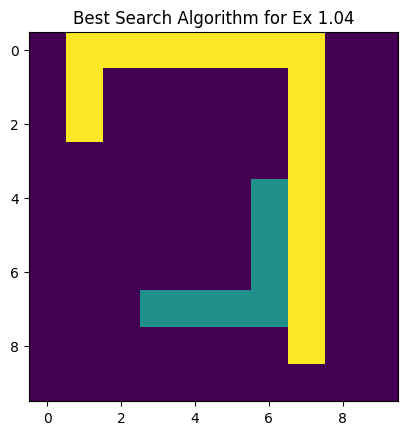

In [7]:
import heapq
from math import dist,sqrt
import numpy as np
import matplotlib.pyplot as plt

#CODIGO BUENO Y PROBADO 

# Update initial and goal states
# Data for 1.14
start = (2, 1)
end = (8, 7)
maze = []
path = []
costs = {start: 0}
final_costs_list = []

# Assume this part reads your maze correctly
with open("/Users/davidroldanmachado/Desktop/ICC/8/ICC-CI/Ex/EjercicioBestSearch/maze_04.csv", "r") as file:
    for line in file:
        line = line.split(",")
        row = []
        for c in line:
            if "1" in c:
                row.append(1)
            else:
                row.append(0)
        maze.append(row)



# print("Before maze", maze)
# Euclidean distance as the heuristic
def euclidean_distance(start, end):
    return (sqrt((start[0] - end[0])**2 + (start[1] - end[1])**2))

def reconstruct_path(start, current, predecessors,costs):
    
    # print(costs)
    path = []
    while current != start:
        path.insert(0, current)
        current = predecessors[current]
    path.insert(0, start)
    
    final_cost = 0
    for i in path[1:]:
        final_cost += costs[i]


    return path, final_cost 


def best_first_search(start, goal, maze):
    # Directions in clockwise order: North, East, South, West
    directions = [(0, -1), (1, 0), (0, 1), (-1, 0)]
    queue = []
    heapq.heappush(queue, (euclidean_distance(start, goal), start))
    predecessors = {start: None}
    visited = set(start)
    

    while queue:
        current_heuristic, current_node = heapq.heappop(queue)
        if current_node == goal:
            return reconstruct_path(start, goal, predecessors, costs)


        for direction in directions:
            next_node = (current_node[0] + direction[0], current_node[1] + direction[1])
            if (0 <= next_node[0] < len(maze) and 0 <= next_node[1] < len(maze[0]) and maze[next_node[0]][next_node[1]] == 0
            and maze[next_node[0]][next_node[1]] == 0 and next_node not in visited):
               # Check if not visited
                new_cost = euclidean_distance(current_node, next_node)
                heapq.heappush(queue, (new_cost, next_node))
                predecessors[next_node] = current_node
                costs[next_node] = new_cost
                # final_costs_list.append(new_cost)
                visited.add(next_node)  # Mark as visited
                # maze[next_node] = 2
                
        # print(final_costs_list)
    return None

def main():
    result,final_c = best_first_search(start, end, maze)
    if result is not None:
        print("Number of steps: ", len(result))
        print("Final Cost: ", final_c)
        print("Final path: ", result)

        for (x, y) in result:
            maze[x][y] = 2  # Mark the final path
        plt.title("Best Search Algorithm for Ex 1.13")
        plt.imshow(maze, cmap='viridis', origin='upper')
        plt.show()
        
        

        #plt.colorbar()  # Optional: Adds a colorbar to help distinguish values
    else:
        print("No path found.")

if __name__ == "__main__":
    main()
